<a href="https://colab.research.google.com/github/irfoooo/Projects/blob/main/Sales_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline     
sns.set(color_codes=True)

In [ ]:
df = pd.read_csv("/content/data.csv") #/content/data.csv
# To display the top 5 rows 
df.head(5)   

,Unnamed: 0,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type
0,0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,02-03-2022 09:51,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet
1,1,931ad550-09e8-4da6-beaa-8c9d17be9c60,06-03-2022 10:33,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet
2,2,ae133534-6f61-4cd6-b6b8-d1c1d8d90aea,04-03-2022 17:20,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38,e-wallet
3,3,157cebd9-aaf0-475d-8a11-7c8e0f5b76e4,02-03-2022 17:23,80da8348-1707-403f-8be7-9e6deeccc883,fruit,gold,0.19,4,0.76,e-wallet
4,4,a81a6cd3-5e0c-44a2-826c-aea43e46c514,05-03-2022 14:32,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,basic,4.49,2,8.98,debit card


In [ ]:
df.shape
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)


number of duplicate rows:  (0, 10)


In [ ]:
df.dtypes


Unnamed: 0          int64
transaction_id     object
timestamp          object
product_id         object
category           object
customer_type      object
unit_price        float64
quantity            int64
total             float64
payment_type       object
dtype: object

In [ ]:
df = df.drop(['Unnamed: 0', 'transaction_id', 'payment_type'], axis=1)
df.head(5)

,timestamp,product_id,category,customer_type,unit_price,quantity,total
0,02-03-2022 09:51,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98
1,06-03-2022 10:33,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99
2,04-03-2022 17:20,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38
3,02-03-2022 17:23,80da8348-1707-403f-8be7-9e6deeccc883,fruit,gold,0.19,4,0.76
4,05-03-2022 14:32,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,basic,4.49,2,8.98


In [ ]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.head(5)

,timestamp,product_id,category,customer_type,unit_price,quantity,total
0,2022-02-03 09:51:00,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98
1,2022-06-03 10:33:00,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99
2,2022-04-03 17:20:00,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38
3,2022-02-03 17:23:00,80da8348-1707-403f-8be7-9e6deeccc883,fruit,gold,0.19,4,0.76
4,2022-05-03 14:32:00,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,basic,4.49,2,8.98


In [ ]:
df['day']=df["timestamp"].dt.day_name()
df.head()

,timestamp,product_id,category,customer_type,unit_price,quantity,total,day
0,2022-02-03 09:51:00,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,Thursday
1,2022-06-03 10:33:00,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,Friday
2,2022-04-03 17:20:00,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38,Sunday
3,2022-02-03 17:23:00,80da8348-1707-403f-8be7-9e6deeccc883,fruit,gold,0.19,4,0.76,Thursday
4,2022-05-03 14:32:00,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,basic,4.49,2,8.98,Tuesday


In [ ]:
df = df.drop(['timestamp','product_id'], axis=1)
df.head(5)

,category,customer_type,unit_price,quantity,total,day
0,fruit,gold,3.99,2,7.98,Thursday
1,fruit,standard,3.99,1,3.99,Friday
2,fruit,premium,0.19,2,0.38,Sunday
3,fruit,gold,0.19,4,0.76,Thursday
4,fruit,basic,4.49,2,8.98,Tuesday


In [ ]:
df = df.rename(columns={"category": "Item", "customer_type": "Membership"})
df.head()

,Item,Membership,unit_price,quantity,total,day
0,fruit,gold,3.99,2,7.98,Thursday
1,fruit,standard,3.99,1,3.99,Friday
2,fruit,premium,0.19,2,0.38,Sunday
3,fruit,gold,0.19,4,0.76,Thursday
4,fruit,basic,4.49,2,8.98,Tuesday


In [ ]:
print(df.isnull().sum())

Item          0
Membership    0
unit_price    0
quantity      0
total         0
day           0
dtype: int64


In [ ]:
df.Item.value_counts()

fruit                    998
vegetables               846
packaged foods           507
baked goods              443
canned foods             431
refrigerated items       425
kitchen                  382
meat                     382
dairy                    375
beverages                301
cheese                   293
cleaning products        292
baking                   264
snacks                   263
frozen                   263
seafood                  253
medicine                 243
baby products            224
condiments and sauces    181
personal care            177
pets                     161
spices and herbs         125
Name: Item, dtype: int64

Text(0.5, 0, 'Item')

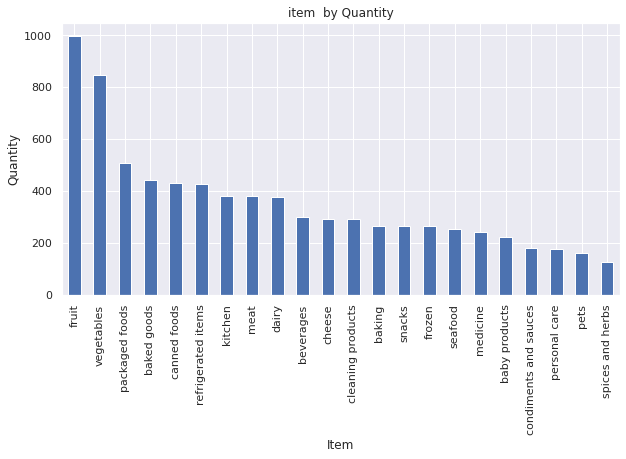

In [ ]:
df.Item.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("item  by Quantity")
plt.ylabel('Quantity')
plt.xlabel('Item')

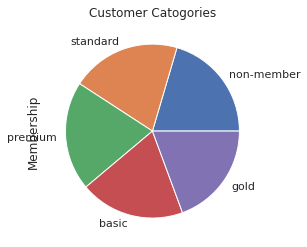

In [ ]:
df.Membership.value_counts().plot(kind='pie');
plt.title("Customer Catogories")
plt.show()


<BarContainer object of 7829 artists>

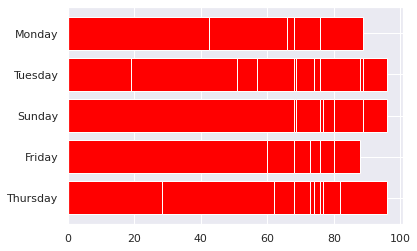

In [ ]:
y = df['total']
x = df['day']

plt.barh(x,y ,color ='red')

In [ ]:
df.day.value_counts()

Thursday    2246
Sunday      2212
Monday      1165
Friday      1132
Tuesday     1074
Name: day, dtype: int64

In [ ]:
df.shape

(7829, 6)

In [ ]:
df.Membership.value_counts()


non-member    1601
standard      1595
premium       1590
basic         1526
gold          1517
Name: Membership, dtype: int64